# **Google Runoff Reanalysis & Reforecast dataset (GRRR) extraction**

This notebook is complementary to the colab (https://colab.research.google.com/drive/1FnXXSEQqU1TJhMPiNeWUTr9LnbJwZzMm?usp=sharing) which facilitates reading the GRRR.

GRRR consists of hydrologic predictions by Google state-of-the-art (SOTA) hydrologic model, an improved version of the model described in the Nature article (https://www.nature.com/articles/s41586-024-07145-1), with full global coverage and daily resolution. It includes:
* Streamflow reanalysis data for ±1M hybas's (hydrological basin) for 1980 - 2023, on which, too, return period values are based and calculated (the ‘severity threshold levels’ we already knew);
* Streamflow reforecast data for ±1M hybas's for 2016 - 2022, with 7-day lead times.


##### **Step-by-step plan for the analysis:**

- Make a list of all new hybas locations (of interest?). After the update, a **lot** of new stations have been added to FloodHub, 10^2 - 10^3 ish range. To download this manually would be extremely tedious, so maybe Google can help with this. It would be good to automate this for later as well, of course. Maybe there's a way to get all hybas stations in the colab.
- Think of a method (which finishes the downloads and then goes to the next one, or do the analysis in colab) which efficiently handles all data. Then, download all data for the hybases with the colab


- With the data ready, make functions (that I discussed with Els) to make events etc.: [WERK DIT OOK UIT]

##### **Extract Mali data**

In [1]:
import analyse


Running __init__.py for GoogleFloodHub-data-analyser

Running __init__.py for GoogleFloodHub-data-extractor
GoogleFloodHub-data-extractor initialized

GoogleFloodHub-data-analyser initialized



In [2]:
df_Mali_gauges, df_Mali_gauge_models, df_Mali_forecasts = \
    analyse.get_country_data('Mali','2024-07-08', '2024-10-08')

In [3]:
print(df_Mali_gauges['gaugeId'])

0     hybas_1120641660
1     hybas_1120650110
2     hybas_1120661040
3     hybas_1120679780
4     hybas_1120689830
5     hybas_1120705070
6     hybas_1120737100
7     hybas_1120739110
8     hybas_1120758950
9     hybas_1120766460
10    hybas_1121890140
11    hybas_1121893090
12    hybas_1121895840
13    hybas_1121900350
14    hybas_1121905290
15    hybas_1121919510
Name: gaugeId, dtype: object


Replace the comment-block (1) with comment-block (2) in colab (of the aforementioned URL) for the Mali data to download

In [4]:
""" comment-block (1)
gauge_reforecast_ds = reforecast_ds.sel(gauge_id=hybas_id).compute()
gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id=hybas_id).compute()
gauge_return_periods_ds = return_periods_ds.sel(gauge_id=hybas_id).compute()
"""

""" comment-block (2)
Mali_hybases = [
  'hybas_1120641660',
  'hybas_1120650110',
  'hybas_1120661040',
  'hybas_1120679780',
  'hybas_1120689830',
  'hybas_1120705070',
  'hybas_1120737100',
  'hybas_1120739110',
  'hybas_1120758950',
  'hybas_1120766460',
  'hybas_1121890140',
  'hybas_1121893090',
  'hybas_1121895840',
  'hybas_1121900350',
  'hybas_1121905290',
  'hybas_1121919510'
]

for hybas_id in Mali_hybases:
  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()
  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()
  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()

  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')
  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')
  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')

  files.download(f'{hybas_id}_reforecast_ds.nc')
  files.download(f'{hybas_id}_reanalysis_ds.nc')
  files.download(f'{hybas_id}_return_periods_ds.nc')
"""

" comment-block (2)\nMali_hybases = [\n  'hybas_1120641660',\n  'hybas_1120650110',\n  'hybas_1120661040',\n  'hybas_1120679780',\n  'hybas_1120689830',\n  'hybas_1120705070',\n  'hybas_1120737100',\n  'hybas_1120739110',\n  'hybas_1120758950',\n  'hybas_1120766460',\n  'hybas_1121890140',\n  'hybas_1121893090',\n  'hybas_1121895840',\n  'hybas_1121900350',\n  'hybas_1121905290',\n  'hybas_1121919510'\n]\n\nfor hybas_id in Mali_hybases:\n  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()\n  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()\n  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()\n\n  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')\n  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')\n  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')\n\n  files.download(f'{hybas_id}_reforecast_ds.nc')\n  files.download(f'{hybas_id}_reanalysis_ds.nc')\n  files.download(f'{h

This method is not robust, and due to many reoccuring downloads possible overloading colabs RAM or whatever, some files fail to download. This can probably worked around by using time.sleep() or some outer loop with a lag, but the safest option is to download one-by-one by uncommenting hybas ID's:

In [5]:
""" 
# hybas_id = 'hybas_1120641660'
# hybas_id = 'hybas_1120650110'
# hybas_id = 'hybas_1120661040'
# hybas_id = 'hybas_1120679780'
# hybas_id = 'hybas_1120689830'
# hybas_id = 'hybas_1120705070'
# hybas_id = 'hybas_1120737100'
# hybas_id = 'hybas_1120739110'
# hybas_id = 'hybas_1120758950'
# hybas_id = 'hybas_1120766460'
# hybas_id = 'hybas_1121890140'
# hybas_id = 'hybas_1121893090'
# hybas_id = 'hybas_1121895840'
# hybas_id = 'hybas_1121900350'
# hybas_id = 'hybas_1121905290'
# hybas_id = 'hybas_1121919510'
"""

" \n# hybas_id = 'hybas_1120641660'\n# hybas_id = 'hybas_1120650110'\n# hybas_id = 'hybas_1120661040'\n# hybas_id = 'hybas_1120679780'\n# hybas_id = 'hybas_1120689830'\n# hybas_id = 'hybas_1120705070'\n# hybas_id = 'hybas_1120737100'\n# hybas_id = 'hybas_1120739110'\n# hybas_id = 'hybas_1120758950'\n# hybas_id = 'hybas_1120766460'\n# hybas_id = 'hybas_1121890140'\n# hybas_id = 'hybas_1121893090'\n# hybas_id = 'hybas_1121895840'\n# hybas_id = 'hybas_1121900350'\n# hybas_id = 'hybas_1121905290'\n# hybas_id = 'hybas_1121919510'\n"

Now, download the manually added data (after putting it in folders (manually or with os/shutil package))

In [6]:
import xarray as xr

In [7]:
# First, try one hybas_id to test:
hybas_id = 'hybas_1120641660'

ds_reanalysis_1120641660 = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas_id}_reanalysis_ds.nc')
ds_reforecast_1120641660 = xr.open_dataset(f'../data/GRRR/reforecast/{hybas_id}_reforecast_ds.nc')
ds_return_ps_1120641660 = xr.open_dataset(f'../data/GRRR/return_periods/{hybas_id}_return_periods_ds.nc')

In [8]:
print(type(ds_reanalysis_1120641660))

<class 'xarray.core.dataset.Dataset'>


In [9]:
# Now, download for all hybases:
dict_ds_data_Mali = {}
for hybas in df_Mali_gauges['gaugeId']:
    ds_reanalysis = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas}_reanalysis_ds.nc')
    ds_reforecast = xr.open_dataset(f'../data/GRRR/reforecast/{hybas}_reforecast_ds.nc')
    ds_return_ps = xr.open_dataset(f'../data/GRRR/return_periods/{hybas}_return_periods_ds.nc')

    dict_ds_data_Mali[hybas] = {'reanalysis': ds_reanalysis,
                                'reforecast': ds_reforecast,
                                'return_periods': ds_return_ps}

Some plotting functions/utils (partly copied from the same notebook):

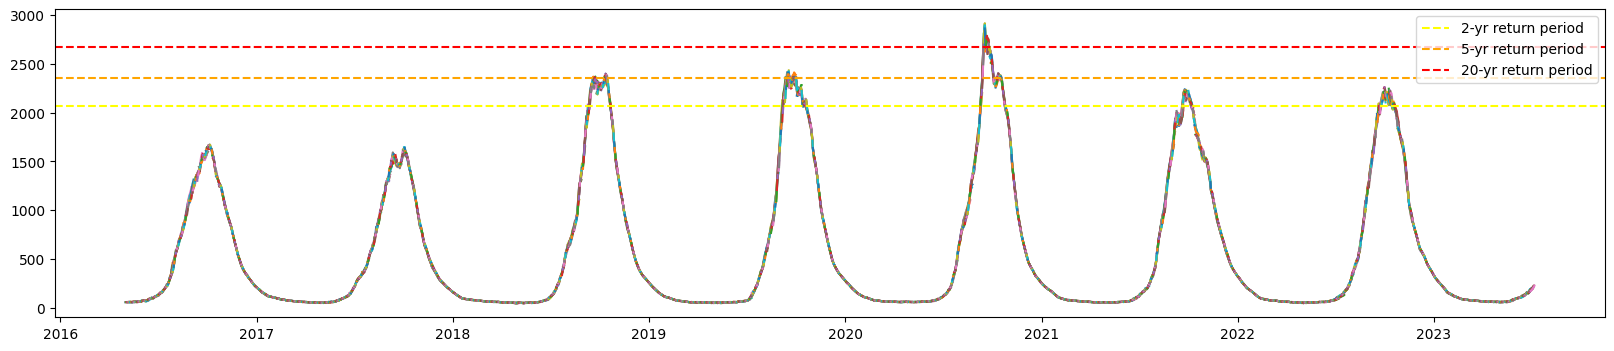

In [10]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

analyse.plot_reforecast(issue_time_start_date, issue_time_end_date,
                        ds_reforecast_1120641660, ds_return_ps_1120641660)

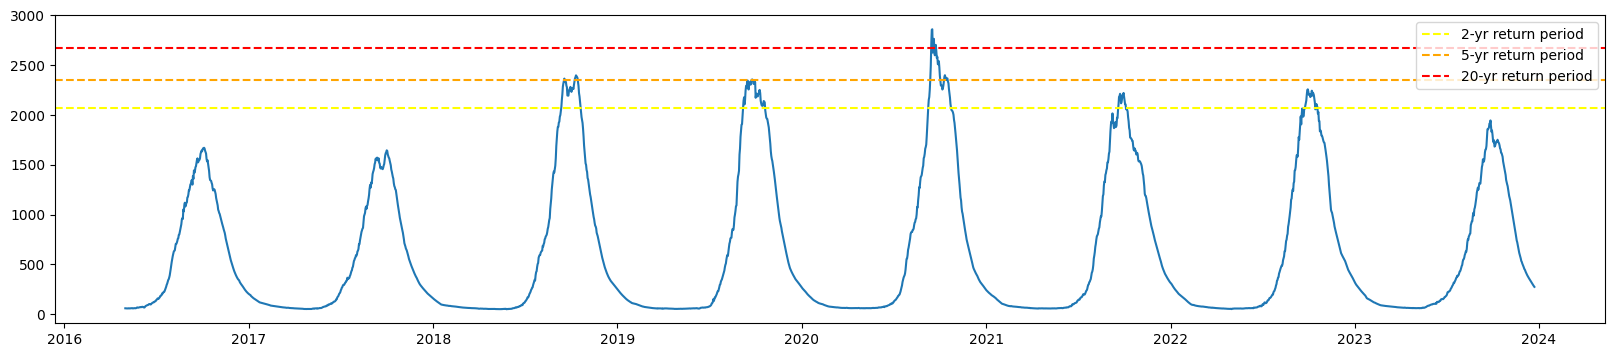

In [11]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

analyse.plot_reanalysis(issue_time_start_date, issue_time_end_date,
                        ds_reanalysis_1120641660, ds_return_ps_1120641660)

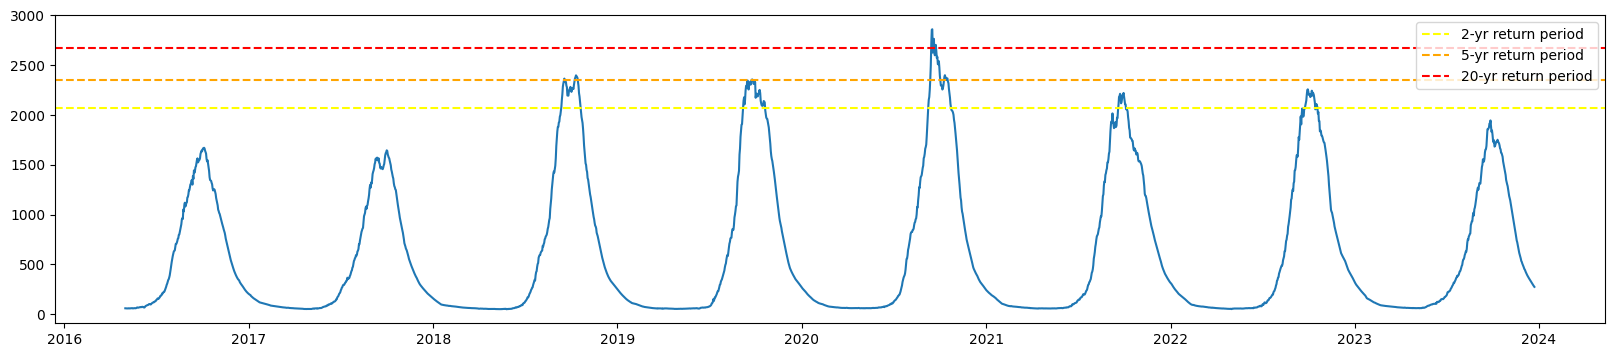

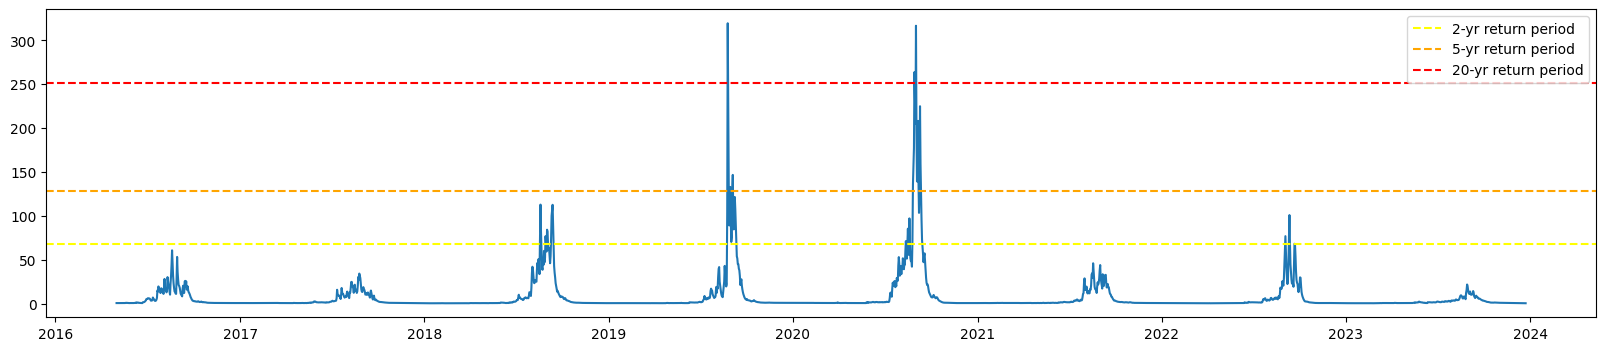

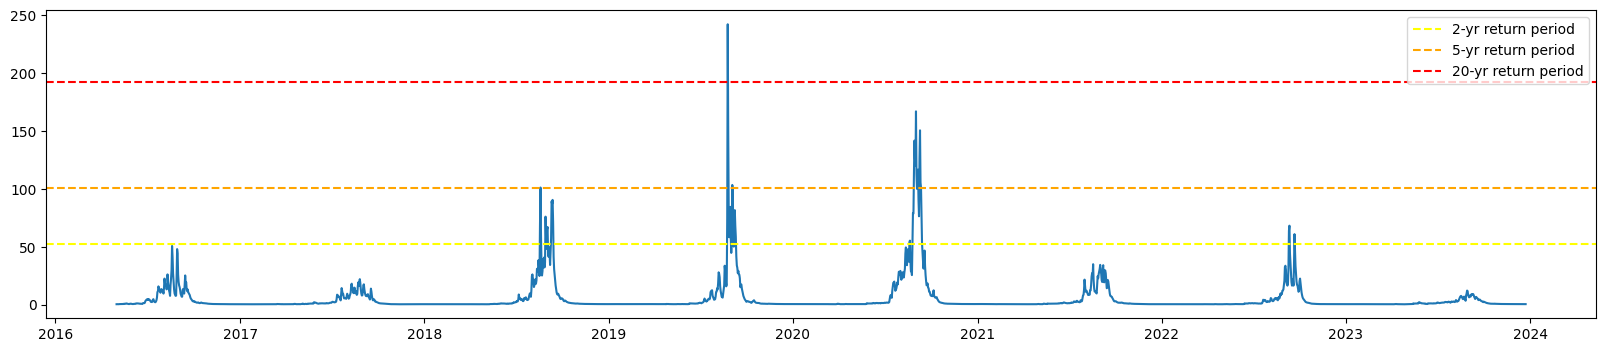

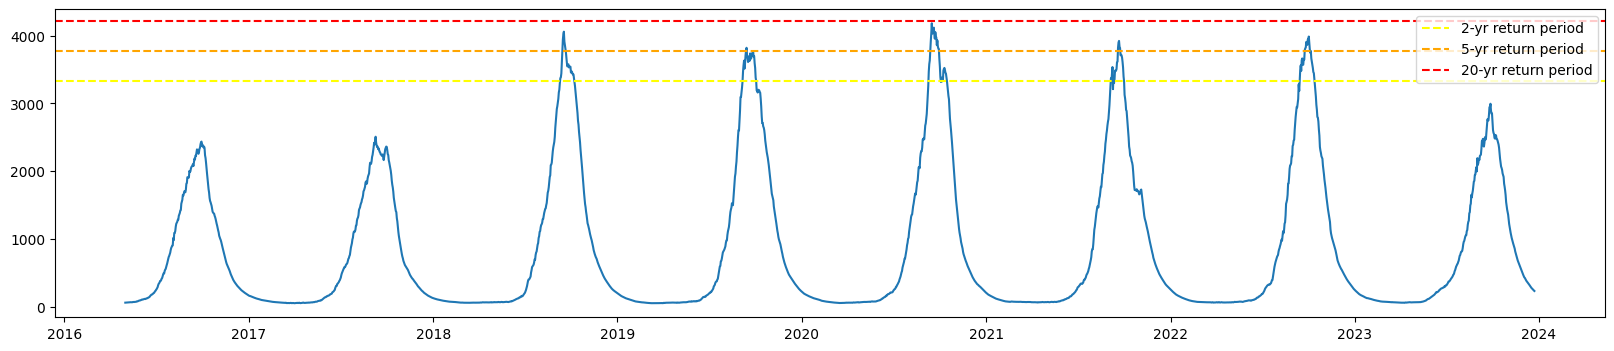

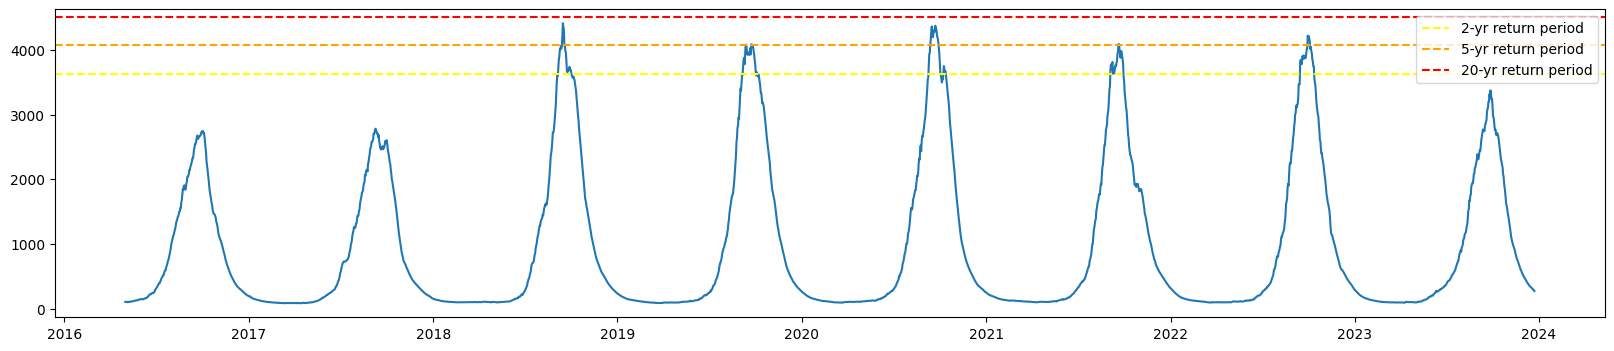

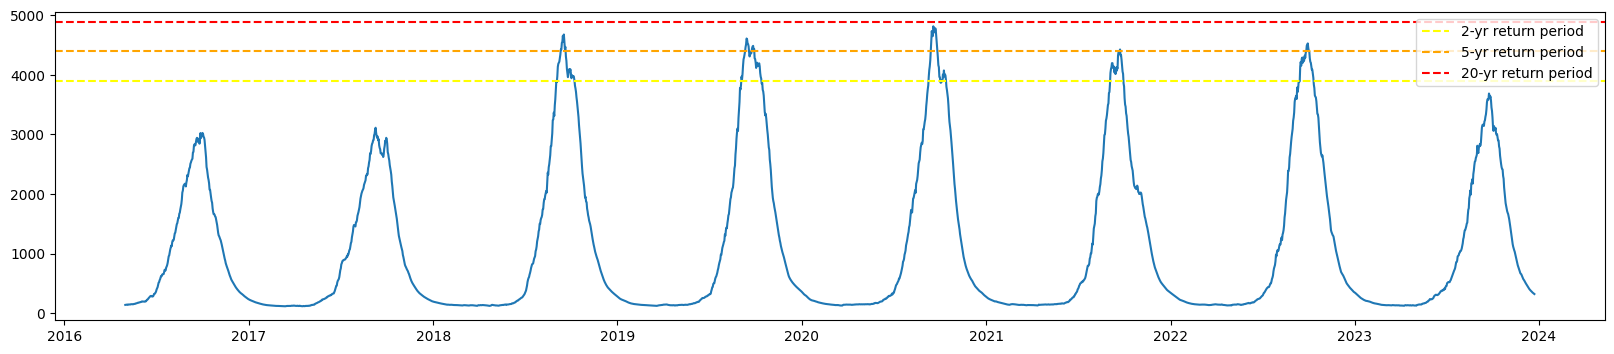

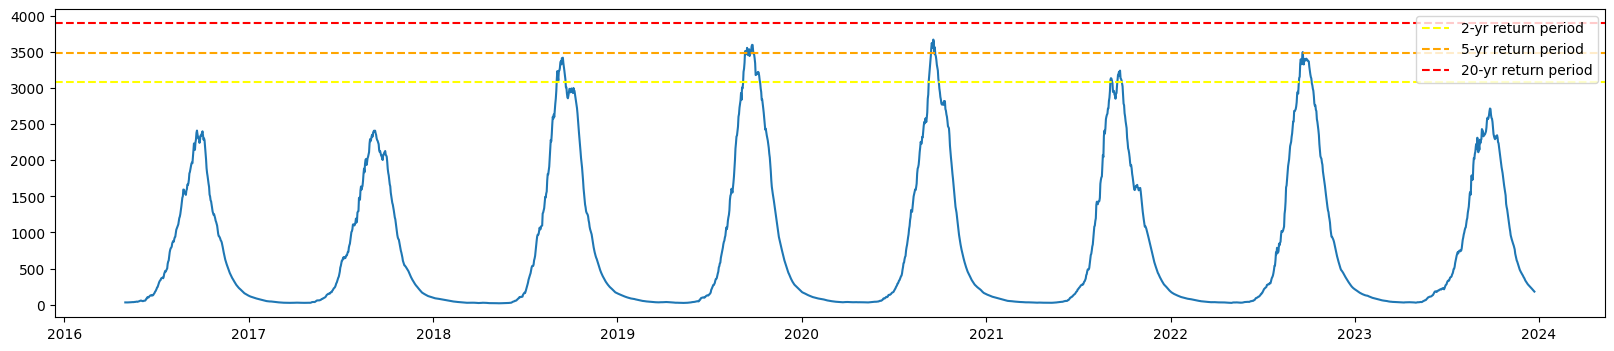

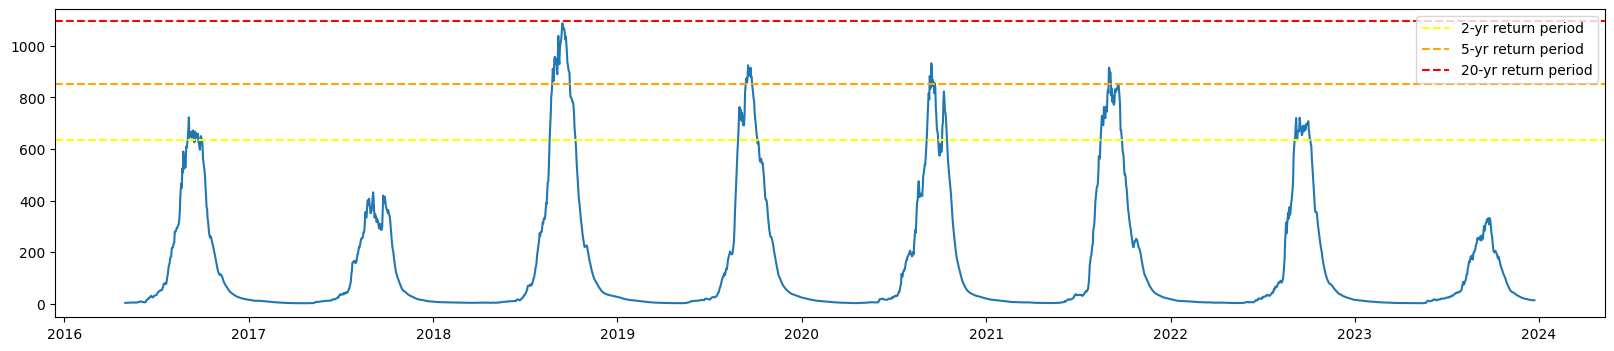

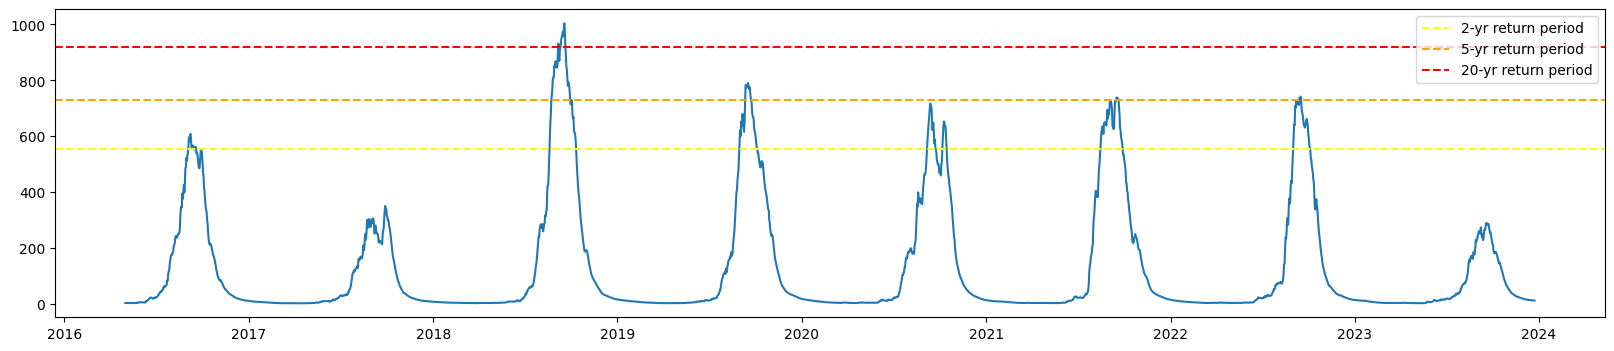

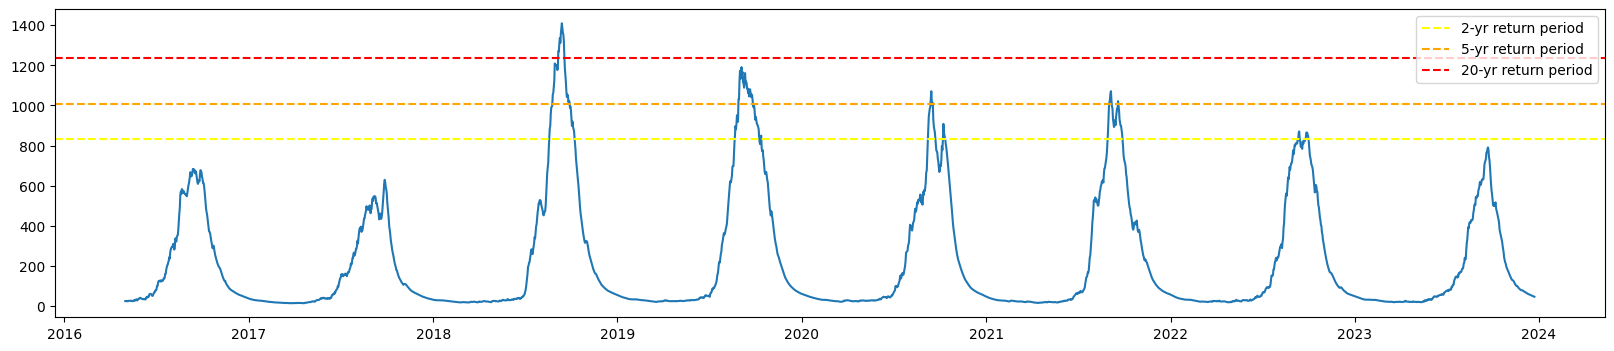

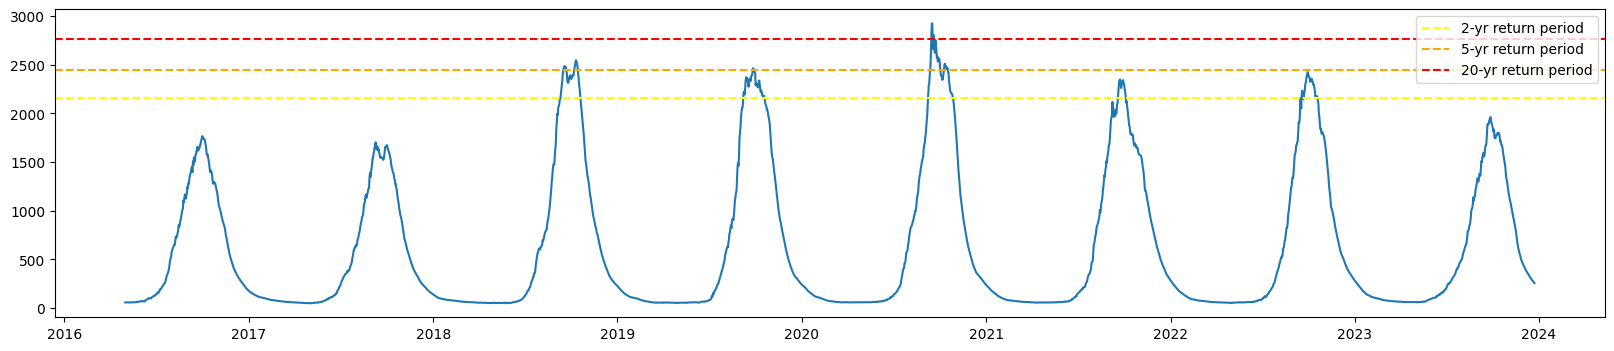

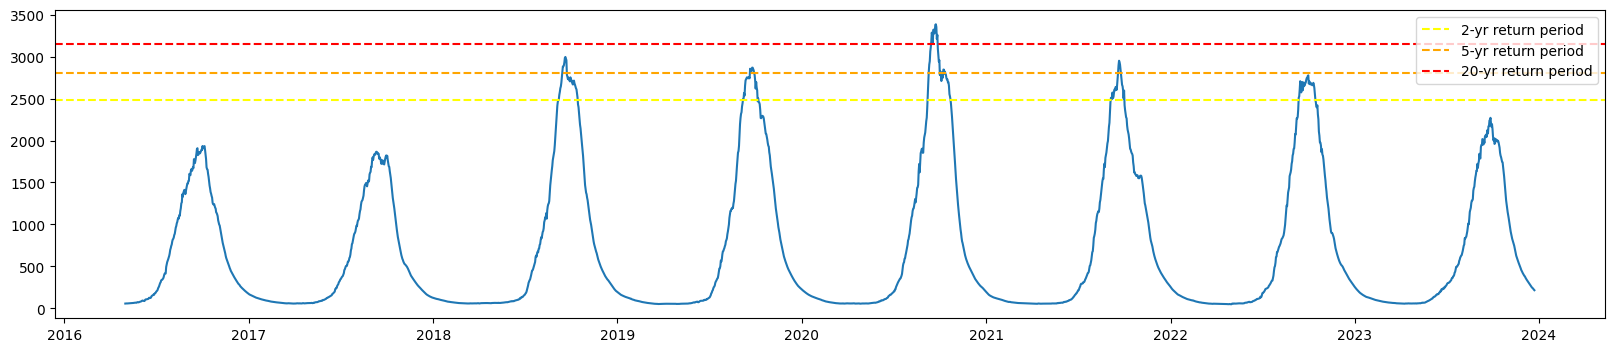

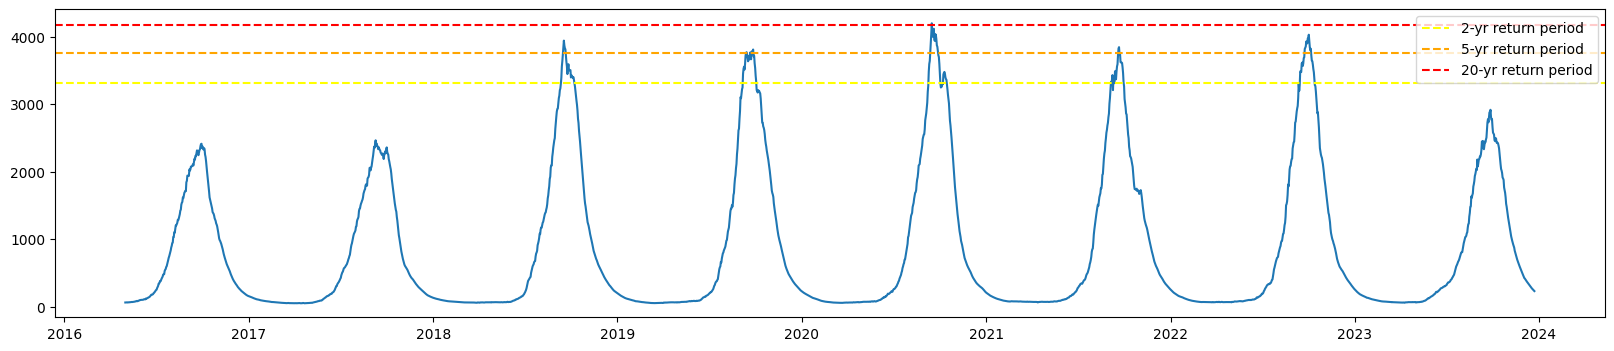

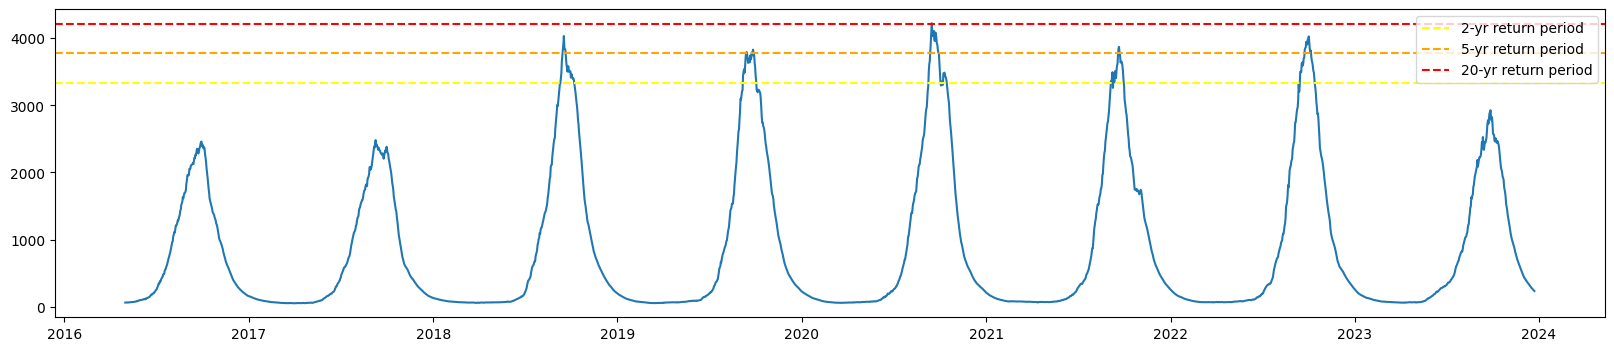

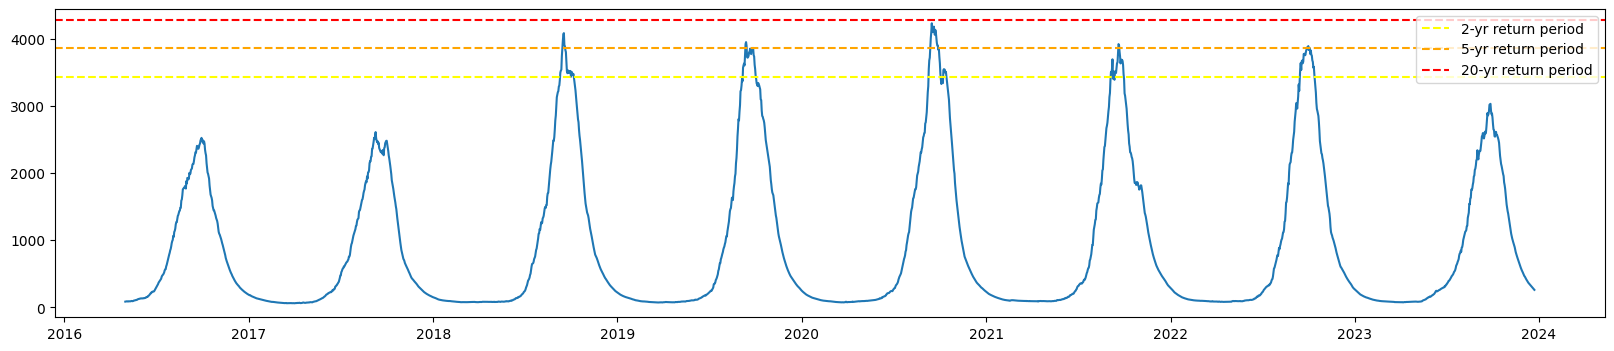

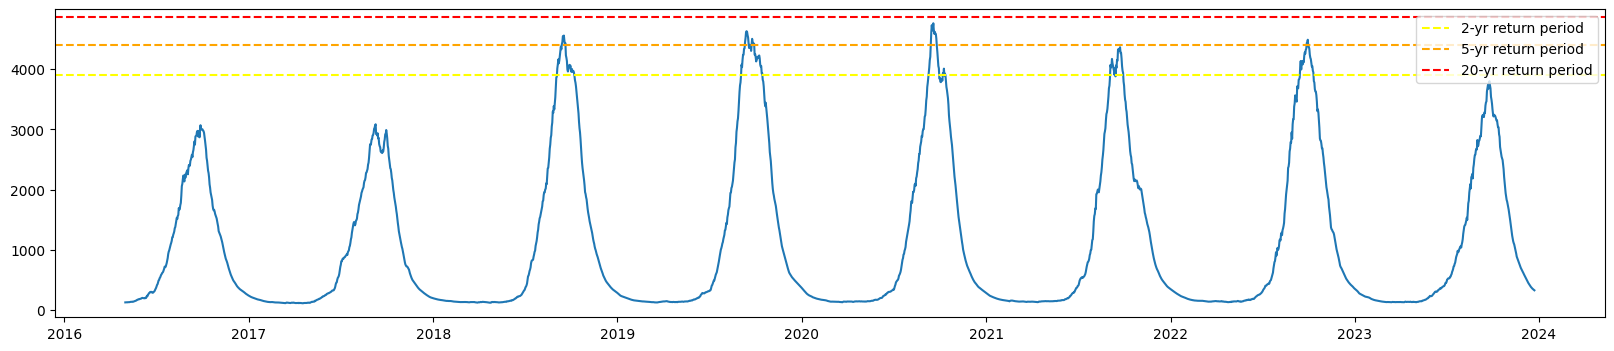

In [12]:
# Plot all reanalysis data for Mali, 2016 - 2024:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

for hybas_id in dict_ds_data_Mali.keys():
    ds_reanalysis = dict_ds_data_Mali[hybas_id]['reanalysis']
    ds_return_ps = dict_ds_data_Mali[hybas_id]['return_periods']

    analyse.plot_reanalysis(issue_time_start_date, issue_time_end_date,
                            ds_reanalysis, ds_return_ps)

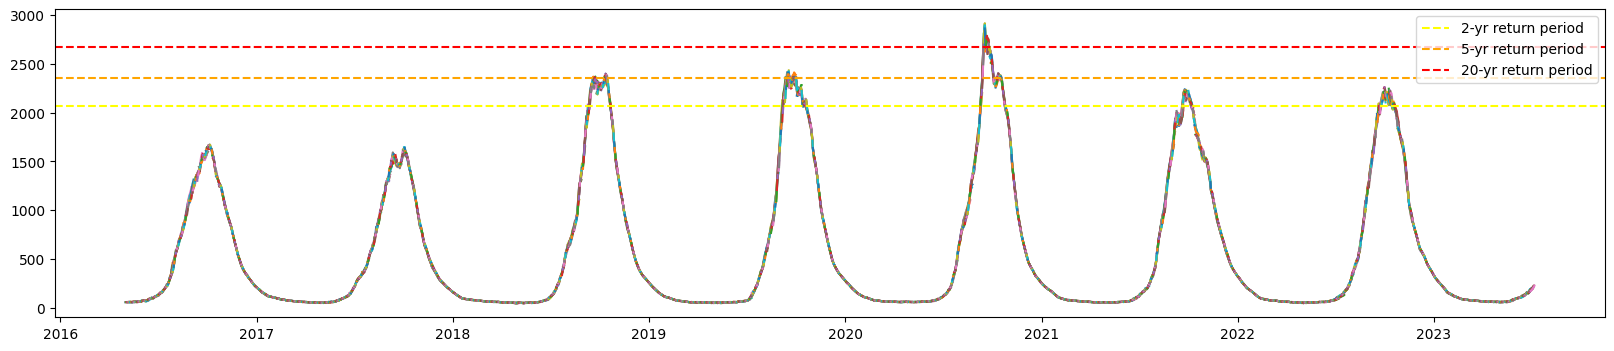

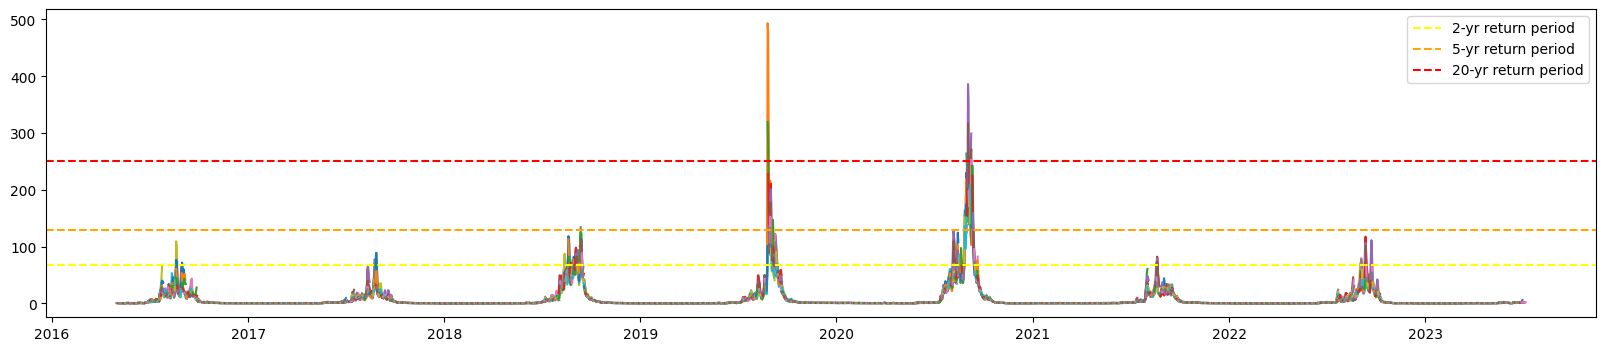

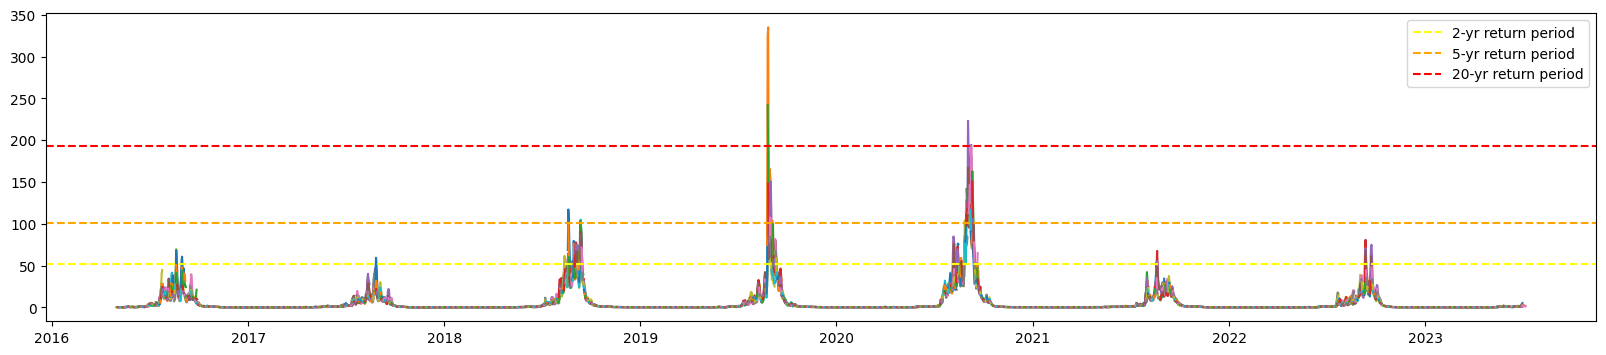

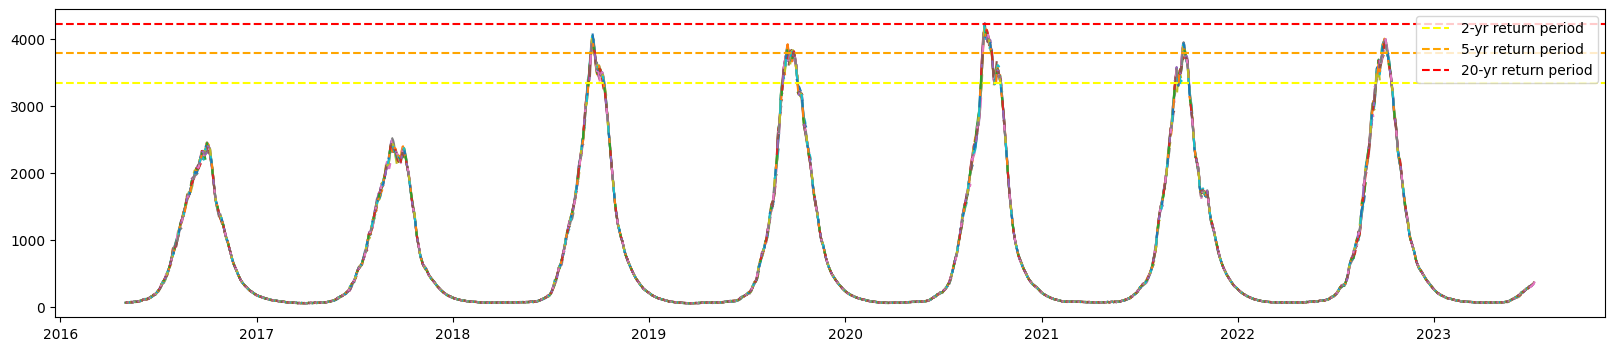

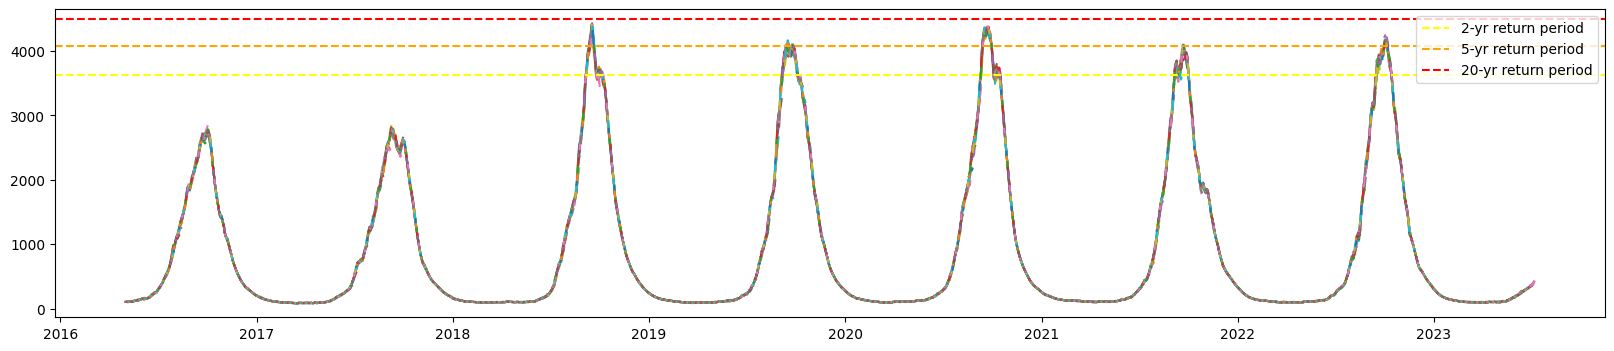

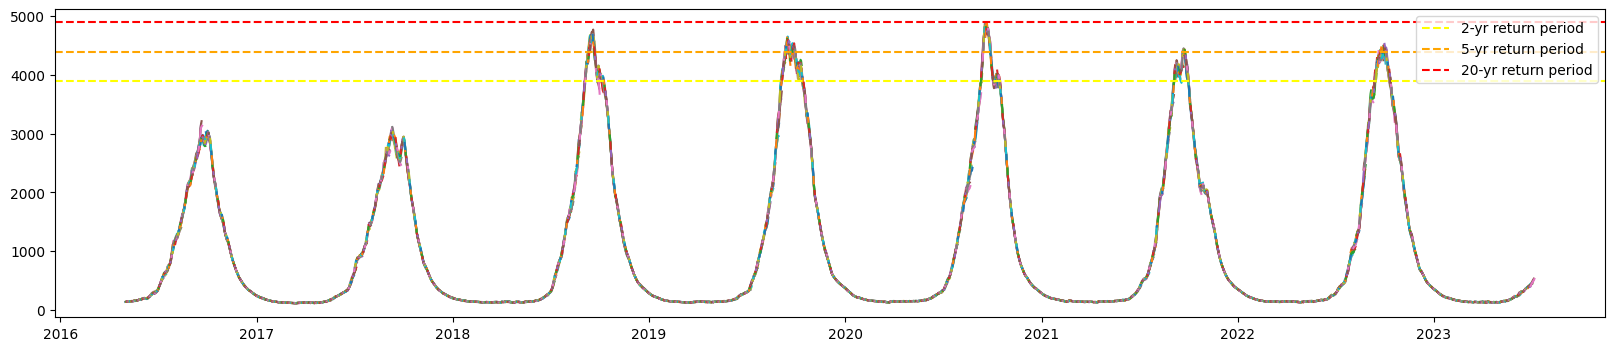

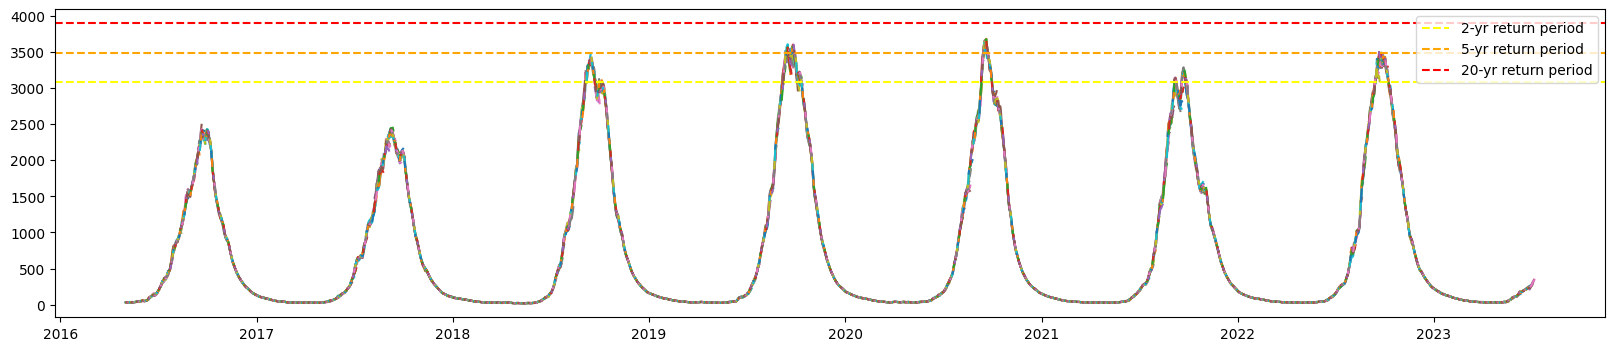

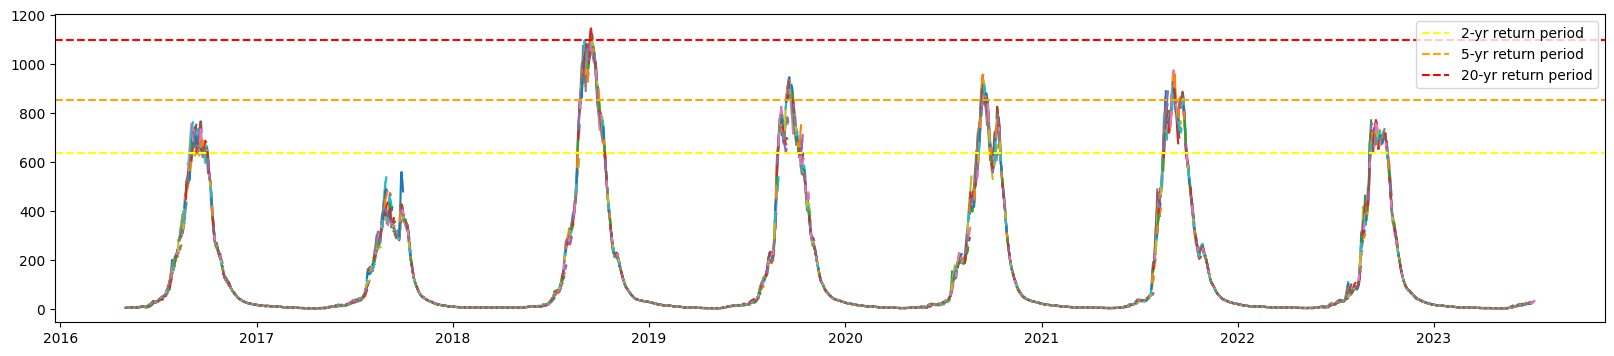

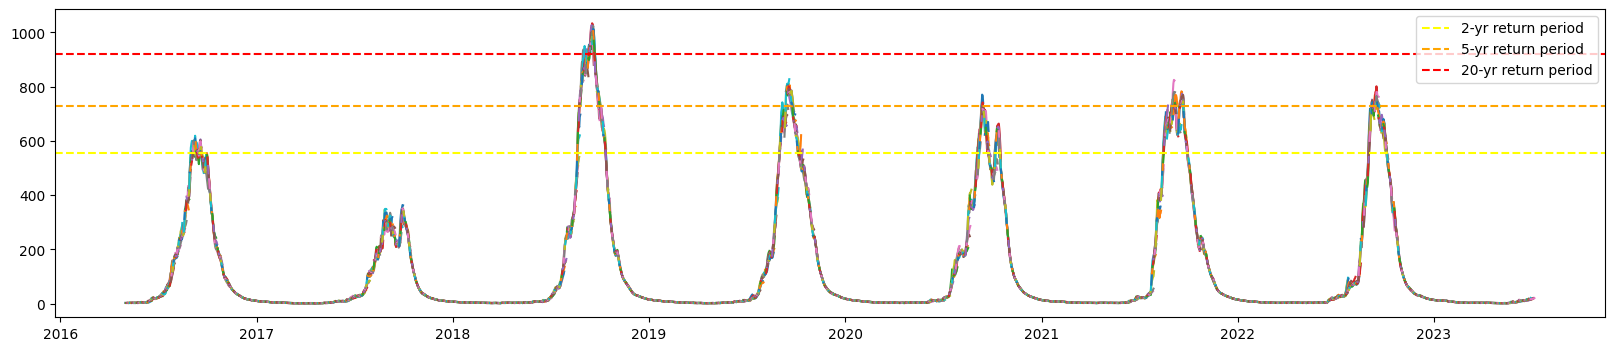

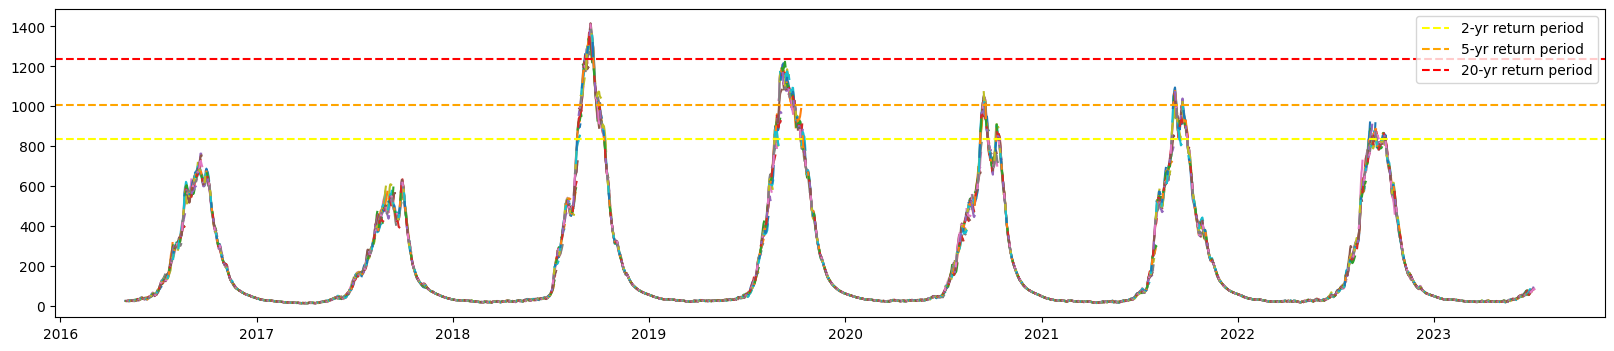

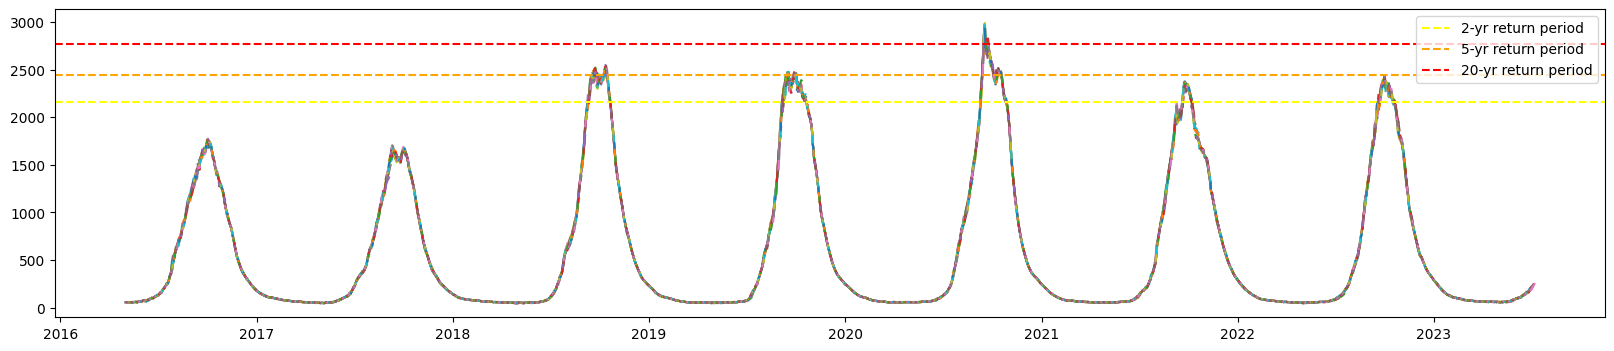

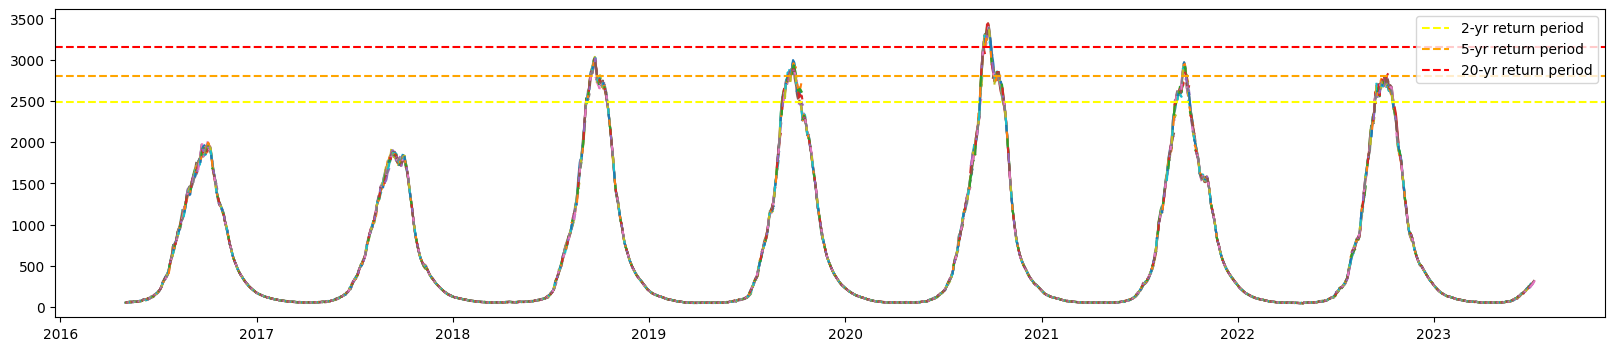

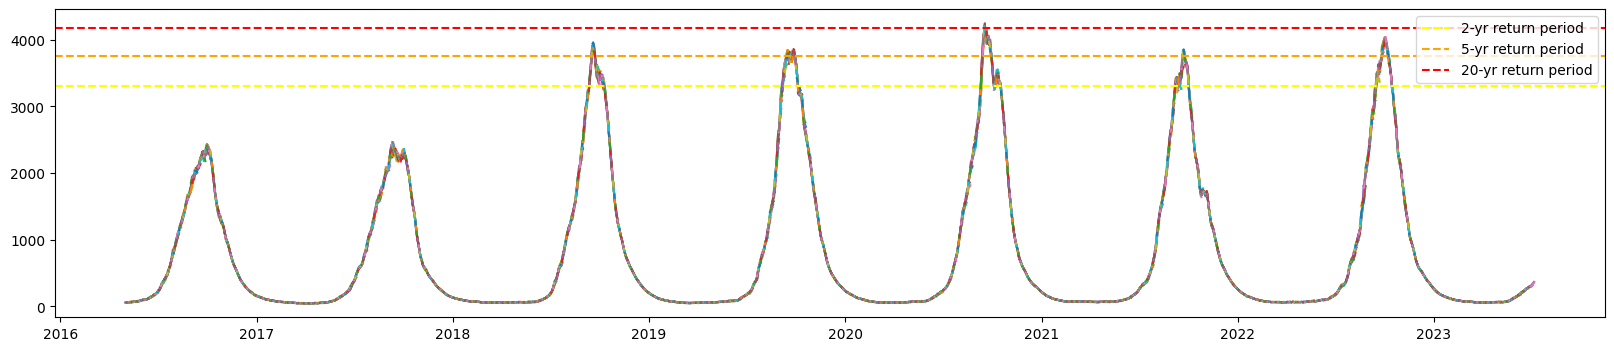

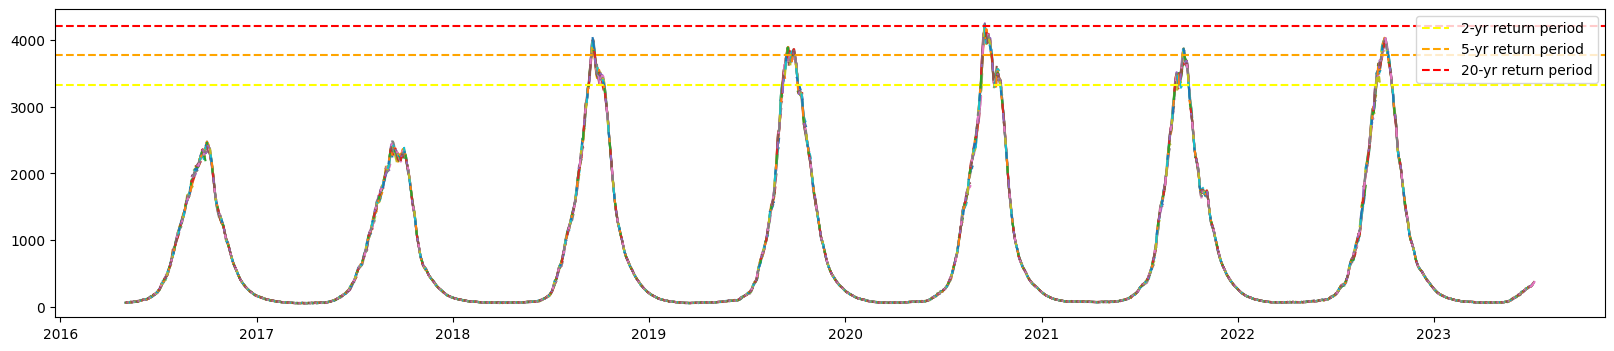

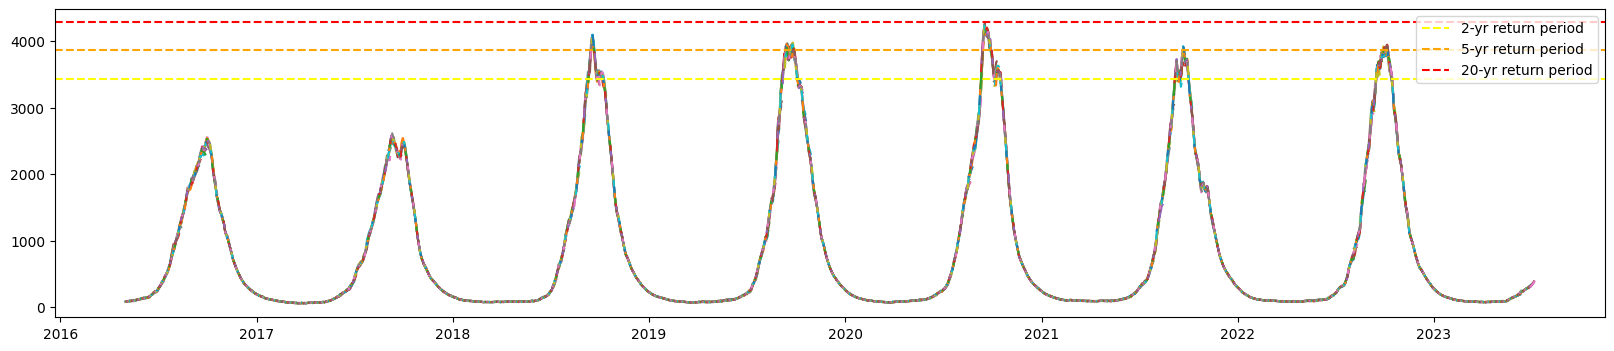

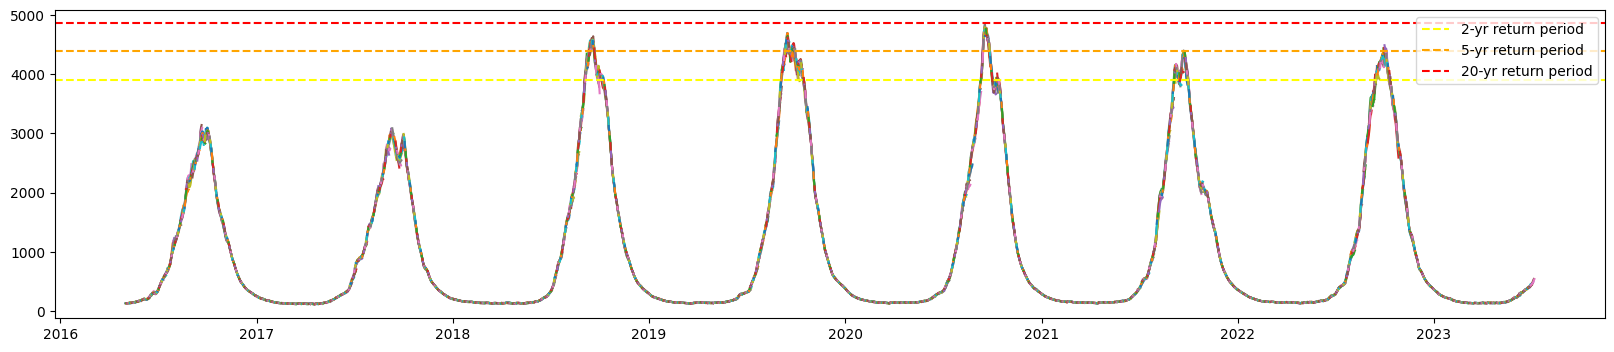

In [15]:
# Plot all reforecast data for Mali, 2016 - 2024:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

for hybas_id in dict_ds_data_Mali.keys():
    ds_reforecast = dict_ds_data_Mali[hybas_id]['reforecast']
    ds_return_ps = dict_ds_data_Mali[hybas_id]['return_periods']

    analyse.plot_reforecast(issue_time_start_date, issue_time_end_date,
                            ds_reforecast, ds_return_ps)